<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 2 - Semester 8

## Tugas Mandiri Data Preparation
---

In [1]:
# 1. Import Library Pandas
import pandas as pd

In [2]:
# 2. Memuat data berformat CSV
df = pd.read_csv('delay_maskapai_tm_2.csv')

In [3]:
# 3. Menampilkan 5 baris teratas dari dataset 
df.head(5)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


#### Data cleansing - membuang kolom
Dari dataset di atas dapat diketahui bahwa kolom Flight merupakan kolom untuk ID masing-masing penerbangan, kolom ini dapat dibuang karena tidak memiliki makna rill. Untuk membuang kolom dapat menggunakan fungsi iloc maupun drop, berikut adalah perbedaan penggunaan loc dan iloc

<center>
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*dYtynwab99wnMqfgyPUd3w.png"  width="500" />
</center>

In [9]:
# 4. Memuat dataset
df_drop1 = pd.read_csv('delay_maskapai_tm_2.csv')

In [10]:
# 5. Menampilkan 5 baris pertama dari dataset
df_drop1.head(5)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [11]:
# 6. Pada variabel df_drop1 pilihlah hanya kolom Airline, AirportFrom, AirportTo
df_drop1 = df_drop1.iloc[:,[3,4,5]] 

In [12]:
df_drop1.head()

,Airline,AirportFrom,AirportTo
0,CO,IAH,PHX
1,OO,DSM,MKE
2,DL,SEA,CVG
3,WN,SNA,MDW
4,CO,IAH,MCO


In [15]:
# 7. Memuat Dataset ke dalam variabel df_drop2
df_drop2 = pd.read_csv('delay_maskapai_tm_2.csv')

In [16]:
# 8. Pada variabel df_drop2 buanglah kolom Flight, Airline, AirportFrom, AirportTo, DayOfWeek, Class
df_drop2.drop(['Flight', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek','Class'],axis=1,inplace=True)

In [17]:
df_drop2.head()

,Time,Length
0,870.0,180.0
1,365.0,66.0
2,740.0,257.0
3,595.0,235.0
4,530.0,133.0


#### Data cleansing - Mengubah indeks di dataframe
Karena tidak ada kolom yang bernilai unik pada dataframe, maka kita akan mencoba mengubah kolom Airline menjadi indeks dari dataset

In [ ]:
# 9. Import Library Numpy
import pandas as pd

In [18]:
# 10. Memuat data
df_index = pd.read_csv('delay_maskapai_tm_2.csv')

In [19]:
# 11. Menjadikan kolom Airline sebagai index
df_index = df_index.set_index('Airline')

In [20]:
# 12. Membuang kolom Flight dengan fungsi drop
df_index.drop(['Flight'],axis=1,inplace=True)

In [21]:
df_index.head()

,Time,Length,AirportFrom,AirportTo,DayOfWeek,Class
Airline,,,,,,
CO,870.0,180.0,IAH,PHX,5,0
OO,365.0,66.0,DSM,MKE,2,0
DL,740.0,257.0,SEA,CVG,7,0
WN,595.0,235.0,SNA,MDW,7,1
CO,530.0,133.0,IAH,MCO,6,1


#### Data cleansing - Merapikan *Fields* dalam data

Pada dataset ini, kolom "Time" merupakan waktu keberangkatan dari sebuah maskapai. Kondisi nilai pada kolom tersebut adalah waktu yang dikonversi ke menit, untuk melihat jumlah delay terbanyak dari semua waktu keberangkatan, kita perlu mengonversi menit tersebut ke dalam jam dan menit

In [42]:
# 13. Mengubah format kolom Time ke dalam Jam dan Menit
Time = pd.to_datetime(df_index.Time, unit='m').dt.strftime('%H.%M')

In [43]:
# 14. Membuat kolom baru dengan nama DepartTime dengan isi datanya berasal dari variabel Time
df_index['DepartTime'] = Time

In [45]:
df_index.head()

,Time,Length,AirportFrom,AirportTo,DayOfWeek,Class,DepartTime
Airline,,,,,,,
CO,870.0,180.0,IAH,PHX,5,0,14.30
OO,365.0,66.0,DSM,MKE,2,0,06.05
DL,740.0,257.0,SEA,CVG,7,0,12.20
WN,595.0,235.0,SNA,MDW,7,1,09.55
CO,530.0,133.0,IAH,MCO,6,1,08.50


In [47]:
# 15. Menghitung jumlah penerbangan dalam 24 jam
Time_Flight_Count = df_index.groupby('DepartTime').sum(numeric_only=True)['Class'].sort_index()
Time_Flight_Count.head()

DepartTime
00.15    1
00.30    0
00.35    1
00.40    1
00.49    0
Name: Class, dtype: int64

In [51]:
# 16. Mengurutkan 20 data dari jumlah penerbangan terbanyak
Time_Flight_Count.sort_values(ascending=False).head(20)

DepartTime
06.00    50
19.00    38
17.00    38
07.00    37
16.00    36
12.00    36
11.40    35
20.00    34
19.05    33
14.45    33
17.30    32
10.00    32
12.05    32
11.55    31
16.30    31
18.15    30
15.15    30
11.45    30
18.20    29
12.30    29
Name: Class, dtype: int64

Dari kode di atas dapat diketahui bahwa waktu 06.00 merupakan waktu dengan jumlah terbanyak. Berikut kita akan lakukan visualisasi dengan line chart

In [52]:
# 17. Mengimport library pyplot
import matplotlib.pyplot as plt

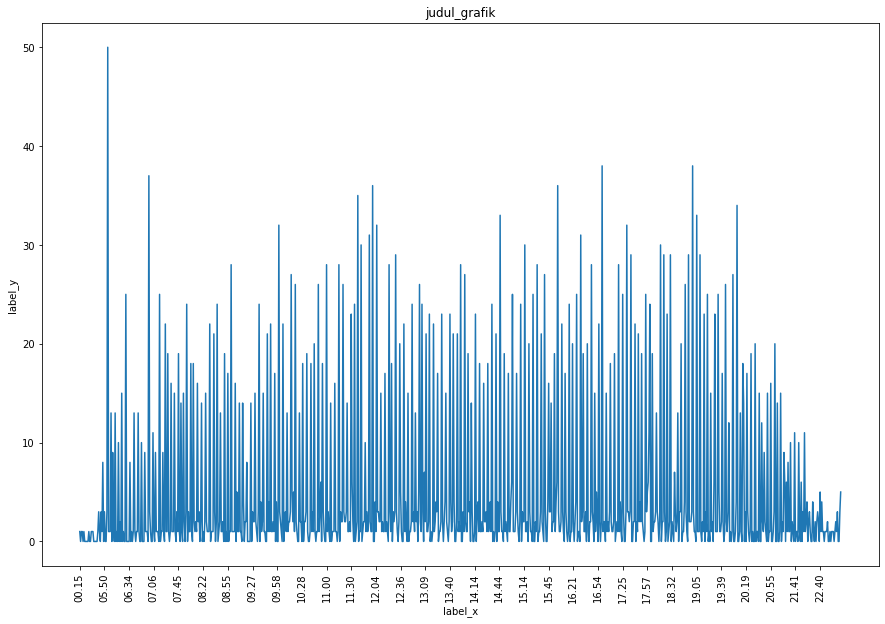

In [55]:
# 18. Mengatur ukuran gambar
plt.figure(figsize=(15, 10))

# 19. Melakukan plot data
Time_Flight_Count.plot()

# 20. Mengatur label sumbu x
ticks = range(0, len(Time_Flight_Count.index), 30)  # Menentukan posisi label setiap setengah jam
labels = Time_Flight_Count.index[ticks]  # Mengambil label berdasarkan posisi
plt.xticks(rotation=90) # Mengatur posisi rotasi label pada sumbu x
plt.xticks(ticks, labels)  # Mengatur posisi dan label pada sumbu x

# 21. Mengatur label sumbu x, y dan judul grafik
plt.xlabel('label_x')
plt.ylabel('label_y')
plt.title('judul_grafik')


# 22. Menampilkan grafik
plt.show()


#### Data cleansing - Mengganti Nama Kolom

In [56]:
# 23. Memuat Dataset
df_rename_col = pd.read_csv('delay_maskapai_tm_2.csv')

In [ ]:
# 24. Ubah Nama Kolom Flight -> ID Flight, Airline -> Maskapai, Class -> Kelas
df_rename_col = df_rename_col.rename(columns=
                            {"Flight":"ID"
                             ,"Airline":"Maskapai"
                             ,"Class":"Kelas"})

In [ ]:
# 25. Menampilkan 10 data teratas
df_rename_col.head(10)